## Introduction 
### Weekly assignment 1: exploratory data analysis


For this first weekly assignment I will learn how to do a exploratory data analysis. The topic of this assignment is exploring data from activity trackers. I will first clean the data and then I will explore the data.

### Data Cleaning

In [2]:
import pandas as pd 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

steps = pd.read_csv('steps.csv', sep=';')
steps.head

<bound method NDFrame.head of       id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929        NaN     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2

In [3]:
survey = pd.read_csv('survey.csv')

In [6]:
# Read in and merge the two data sets
# Clean the data: remove impossible values
df = pd.merge(steps, survey, on='id')
df = df.fillna(0)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [7]:
# Create the variable mean steps per participant.
meanSteps = df.loc['0':'929','20-6-2013':'13-5-2014']
meanSteps = meanSteps.mean(axis = 1).reset_index(name='mean steps per participant')#.set_index('mean steps per participant')
#meanSteps = meanSteps.drop('index', axis=1)
meanSteps.columns = ['id', 'mean steps per participant']
meanSteps.head()

C:\Temp\ipykernel_9436\1372497930.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  meanSteps = df.loc['0':'929','20-6-2013':'13-5-2014']


,id,mean steps per participant
0,0,5133.875000
1,1,2826.371951
2,2,3745.902439
3,3,221.536585
4,4,874.557927


### Exploratory data analysis

<AxesSubplot: xlabel='mean steps per participant', ylabel='Count'>

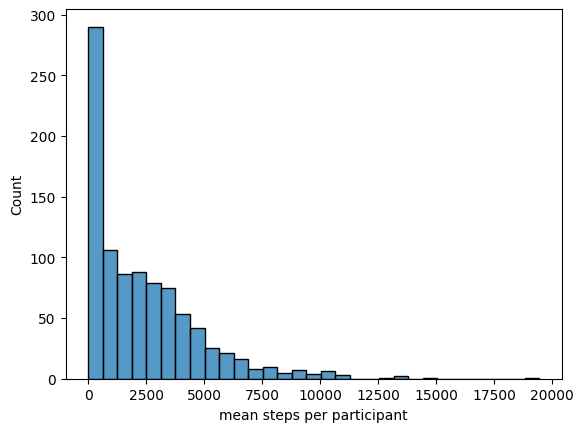

In [8]:
# Graph of the distribution
sns.histplot(meanSteps, kde=False, x='mean steps per participant') 

### Description of the distribution 

The data is right skewed. The graph shows that there are fewer data plots the more you move to the right. So there are fewer participants with a high mean of the total steps. In this area of one of the highest mean steps per participants the graph shows some outliers, for example a participant with a mean step of almost 20000 all the way to the right of the graph. 

C:\Temp\ipykernel_9436\2582402083.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mspp_cv = df[(df['gender'] == 'Female') & (df['age'] == '55-64')].loc['0':'929','20-6-2013':'13-5-2014']


<AxesSubplot: xlabel='mean steps per female'>

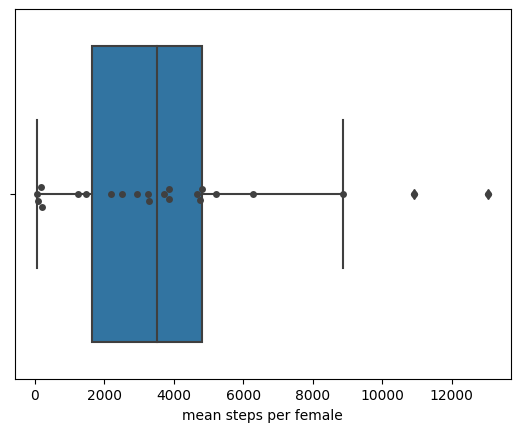

In [9]:
# The relation of mean steps per participant with two categorical variables, age and gender
# mspp_cv = mean steps per participant with categorical variables
mspp_cv = df[(df['gender'] == 'Female') & (df['age'] == '55-64')].loc['0':'929','20-6-2013':'13-5-2014']
mspp_cv = mspp_cv.mean(axis = 1).reset_index(name='mean steps per female')#.set_index('mean steps per female')

# Graph of the relation  
sns.boxplot(x=mspp_cv['mean steps per female'])
sns.swarmplot(x=mspp_cv['mean steps per female'], color='.25')

### Description and interpretation of the results

The data is more skewed to the right. So it is shown that most females within the age of 55 and 64 have a mean steps within around 2000 and 5000. There are some outliers on the right of the boxplot. This can maybe be advanced female walkers or females who have a job that consist of alot of walking on a daily basis. 

## Weekly assignment 2: correlation
### Feature Engineering

BMI gives a better indication of a healty weight. This can be calculated by dividing the weight in kilograms by the square of your height in meters. 

### Exploratory data analysis

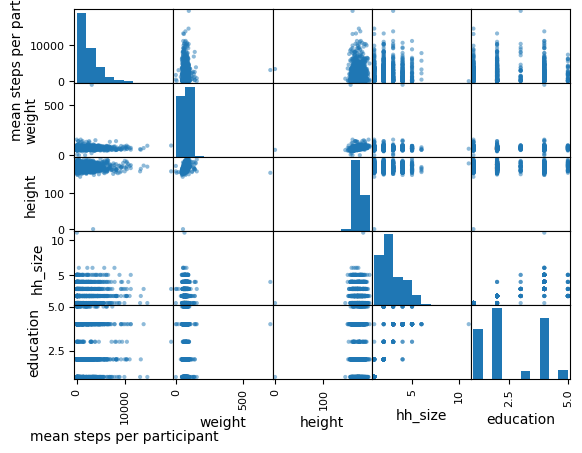

In [10]:
# Make a scatterplot matrix of the numerical variables
# numerical variables: weight, height, the steps, hh-size, age and education
# Combining the mean steps with the numerical variables 
df2 = pd.merge(meanSteps, df, on='id')

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
  
# selecting three numerical features
features = df2[['mean steps per participant', 'age', 'weight', 'height', 'hh_size', 'education']]
   
# plotting the scatter matrix
# with the features
scatter_matrix(features)
plt.show()

#### Describe and interpret the results
The relation between the mean steps per participant, weight and height shows an increasing relationship. 
The scatterplot of the mean steps and hh_size has a decreasing relationships. You can see less points as the data goes to the right and there are a few outliers. The relation between the mean steps and the education is a little bit curved. You can clearly see that weight and height has an effect on the mean steps results, because the outer parts of the scatterplots show less points. This can indicate that people with a lower or heigher weight or height have a lower mean steps results. 

In [11]:
# Make a correlation matrix of the numerical variables
corr = df2[['mean steps per participant', 'age', 'weight', 'height', 'hh_size', 'education']].corr()
corr

C:\Temp\ipykernel_9436\2068178422.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2[['mean steps per participant', 'age', 'weight', 'height', 'hh_size', 'education']].corr()


,mean steps per participant,weight,height,hh_size,education
mean steps per participant,1.000000,0.000802,-0.004424,0.008912,0.013622
weight,0.000802,1.000000,0.238482,0.037852,0.029877
height,-0.004424,0.238482,1.000000,-0.031508,-0.018195
hh_size,0.008912,0.037852,-0.031508,1.000000,0.825572
education,0.013622,0.029877,-0.018195,0.825572,1.000000


The correlation matrix shows that there is a weak relation between the mean steps and the weight, height, hh_size and education.

## Weekly assignment 3: linear regression

### Predictive model

Linear regression is a statistical way of measuringen/predicting the values of the future. 

In [12]:
# Create dummy variables for the categorical variables
# categorical variables: city, gender and education_1
# df_cv = dataframe with categorical variables

df_cv = df[['id', 'city', 'gender', 'education_1']]
df_cv = pd.get_dummies(df_cv)

# df_pm = dataframe predictive model
df_pm = pd.merge(df_cv, meanSteps, on='id')
df_pm


,id,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier,gender_Female,gender_Male,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,mean steps per participant
0,1,1,0,0,0,0,1,0,0,1,0,0,0,2826.371951
1,2,0,1,0,0,0,1,1,0,0,0,0,0,3745.902439
2,3,0,0,0,1,0,1,0,0,1,0,0,0,221.536585
3,4,0,0,1,0,0,1,1,0,0,0,0,0,874.557927
4,5,0,0,0,1,1,0,1,0,0,0,0,0,5554.884146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,924,0,1,0,0,0,1,0,0,1,0,0,0,1742.908537
924,925,0,1,0,0,1,0,0,0,1,0,0,0,731.689024
925,926,0,1,0,0,0,1,1,0,0,0,0,0,6268.954268
926,927,0,0,0,1,0,1,1,0,0,0,0,0,3872.115854


#### Start training the model

First splitting the data into a training set and a test set. 

In [13]:
# Create a X and Y with the needed variables
y = df_pm['mean steps per participant'] 
X = df_pm.loc[:,'city_Bordeaux':'education_1_Vocational']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head() 

,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier,gender_Female,gender_Male,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
66,0,0,1,0,1,0,0,1,0,0,0,0
742,0,0,1,0,0,1,0,0,1,0,0,0
364,1,0,0,0,1,0,1,0,0,0,0,0
368,0,1,0,0,1,0,0,0,1,0,0,0
803,0,1,0,0,1,0,1,0,0,0,0,0


In [14]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [15]:
coef = pd.DataFrame(X.columns.values, lm.coef_) 
coef

,0
2.070932e+16,city_Bordeaux
2.070932e+16,city_Lille
2.070932e+16,city_Lyon
2.070932e+16,city_Montpellier
8.393515e+16,gender_Female
8.393515e+16,gender_Male
-4.134437e+16,education_1_Bachelor
-4.134437e+16,education_1_High school
-4.134437e+16,education_1_Master or doctorate
-4.134437e+16,education_1_No degree


### Evaluation

Model performance. Generate predictions and calculate the R^2 and RMSE.

In [16]:
#Evaluate the model on the test data
# calculating the R^2
y_test_p = lm.predict(X_test) 
r2_score(y_test, y_test_p)

-0.027782805198172333

Calculating the RMSE: the root mean squared error.

In [17]:
# calculating the RMSE
math.sqrt(mean_squared_error(y_test, y_test_p))

2896.391662202117

Plotting the predicted values against the actual value based on the train data

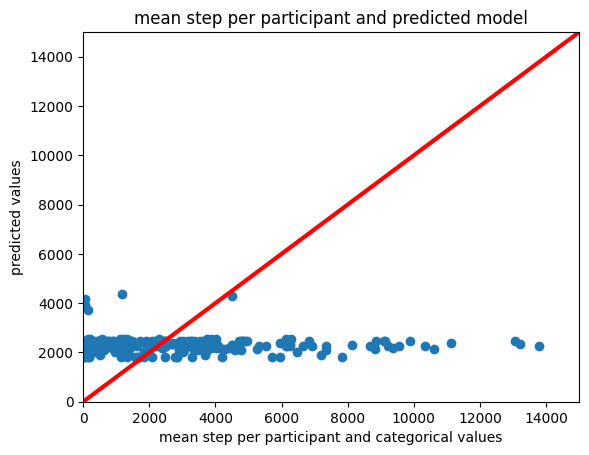

In [18]:
plt.scatter(y_test, y_test_p)
plt.title('mean step per participant and predicted model')
plt.xlim([0,15000])
plt.ylim([0,15000])
plt.xlabel('mean step per participant and categorical values')
plt.ylabel('predicted values')
plt.plot([0,15000], [0,15000], color='red', lw=3) 
plt.show()


### Describe and interpret the results

The predictation is not balanced. There are a few values that are predicted well. But there are more values that the model is predicting to high. This can be seen from the points furthest from the line. There are also some outliers which are predicted to high or to low. There is one outlier exactly on the line. 


## Conclusion

The model made a very poor prediction. This is not a reliable model
